# Mapping Project
### Incidence of Severe acute respiratory syndrome (SARS) in São Paulo Metropolitan Region after the 2020 Brazil election

In [5]:
#first we have loading libraries that we use for build the map
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Manipulating databases

In [20]:
#Reading dataFrame
df = pd.read_csv('C:/Users/dadao/Downloads/database_sars.csv', encoding='utf8', sep=';', low_memory=False)

In [21]:
#Viewing dataFrame
df.head()

,municipio,cd_mun,pop_estimada,n_caso_antes_eleicao,n_caso_depois_eleicao,incidencia,tot_casos
0,ARUJA,3503901,91157,627,2,2.194017,629
1,BARUERI,3505708,276982,2252,39,14.080337,2291
2,BIRITIBA MIRIM,3506607,32936,0,0,0.000000,0
3,CAIEIRAS,3509007,102775,262,1,0.972999,263
4,CAJAMAR,3509205,77934,374,5,6.415685,379


In [22]:
df.describe()

,cd_mun,pop_estimada,n_caso_antes_eleicao,n_caso_depois_eleicao,incidencia,tot_casos
count,3.900000e+01,3.900000e+01,39.000000,39.000000,39.000000,39.000000
mean,3.529287e+06,5.613806e+05,4511.743590,96.025641,8.548688,4607.769231
std,1.624634e+04,1.952878e+06,19274.274114,439.470165,8.319301,19712.814354
min,3.503901e+06,1.597800e+04,0.000000,0.000000,0.000000,0.000000
25%,3.515405e+06,7.391750e+04,234.000000,2.000000,1.828150,235.000000
50%,3.526209e+06,1.619570e+05,644.000000,7.000000,6.755502,647.000000
75%,3.545901e+06,3.377850e+05,1732.000000,31.000000,12.836598,1744.500000
max,3.556453e+06,1.232523e+07,121017.000000,2754.000000,28.448944,123771.000000


In [24]:
#add function to categorize the cases
def categorizar(n):
  if n < 10:
    return '0'
  if n < 101:
    return '10-100'
  if n < 301:
    return '101-300'
  if n < 501:
    return '301-500'
  if n < 1001:
    return '501-1000'
  if n < 2001:
    return '1001-2000'
  if n < 4001:
    return '2001-4000'
  else:
    return '4001-13000'

#Now I use apply to add a new column with this result
df['categ_casos'] = df['tot_casos'].apply(categorizar)
df.head(10)

,municipio,cd_mun,pop_estimada,n_caso_antes_eleicao,n_caso_depois_eleicao,incidencia,tot_casos,categ_casos
0,ARUJA,3503901,91157,627,2,2.194017,629,501-1000
1,BARUERI,3505708,276982,2252,39,14.080337,2291,2001-4000
2,BIRITIBA MIRIM,3506607,32936,0,0,0.000000,0,0
3,CAIEIRAS,3509007,102775,262,1,0.972999,263,101-300
4,CAJAMAR,3509205,77934,374,5,6.415685,379,301-500
5,CARAPICUIBA,3510609,403183,788,17,4.216448,805,501-1000
6,COTIA,3513009,253608,1631,23,9.069115,1654,1001-2000
7,DIADEMA,3513801,426757,2389,83,19.449007,2472,2001-4000
8,EMBU DAS ARTES,3515004,276535,187,2,0.723236,189,101-300
9,EMBU-GUACU,3515103,69901,263,11,15.736542,274,101-300


In [25]:
#let's see all of ours dataFrame cities
df['municipio'].unique()

array(['ARUJA', 'BARUERI', 'BIRITIBA MIRIM', 'CAIEIRAS', 'CAJAMAR',
       'CARAPICUIBA', 'COTIA', 'DIADEMA', 'EMBU DAS ARTES', 'EMBU-GUACU',
       'FERRAZ DE VASCONCELOS', 'FRANCISCO MORATO', 'FRANCO DA ROCHA',
       'GUARAREMA', 'GUARULHOS', 'ITAPECERICA DA SERRA', 'ITAPEVI',
       'ITAQUAQUECETUBA', 'JANDIRA', 'JUQUITIBA', 'MAIRIPORA', 'MAUA',
       'MOGI DAS CRUZES', 'OSASCO', 'PIRAPORA DO BOM JESUS', 'POA',
       'RIBEIRAO PIRES', 'RIO GRANDE DA SERRA', 'SALESOPOLIS',
       'SANTA ISABEL', 'SANTANA DE PARNAIBA', 'SANTO ANDRE',
       'SAO BERNARDO DO CAMPO', 'SAO CAETANO DO SUL',
       'SAO LOURENCO DA SERRA', 'SAO PAULO', 'SUZANO', 'TABOAO DA SERRA',
       'VARGEM GRANDE PAULISTA'], dtype=object)

In [33]:
#ok, let's read GeodataFrame file, this responsable for draw the boundaries 
df_geo = gpd.read_file('C:/Users/dadao/Downloads/regiao_metropolitana_sp.json', encoding='latin1')
print(df_geo.crs)
crs = {'init': 'epsg:29193'}
df_geo.crs = crs
print(df_geo.crs)

epsg:29193
+init=epsg:29193 +type=crs


In [50]:
#let's do a centroid, it means point the center
sars_cases = sars_map.copy()
sars_cases['geometry'] = sars_cases['geometry'].centroid

In [35]:
#we need to know the type of the key variable that we'll use to merge the geodataFrame e dataFrame
df['cd_mun'].dtype

dtype('int64')

In [37]:
df_geo.head()

,CD_MUN,NM_MUN,SIGLA_UF,AREA_KM2,geometry,centroid
0,2513851,Santo Andre,PB,197.791,"POLYGON ((-36.65978 -7.19357, -36.65890 -7.192...",POINT (-36.61466 -7.22108)
1,3503901,Aruja,SP,96.167,"POLYGON ((-46.36995 -23.37809, -46.37010 -23.3...",POINT (-46.31905 -23.38602)
2,3505708,Barueri,SP,65.701,"POLYGON ((-46.83848 -23.51062, -46.83921 -23.5...",POINT (-46.87725 -23.50528)
3,3506607,Biritiba Mirim,SP,317.406,"POLYGON ((-46.09244 -23.56664, -46.09256 -23.5...",POINT (-46.02132 -23.62417)
4,3509007,Caieiras,SP,97.642,"POLYGON ((-46.82345 -23.35390, -46.82345 -23.3...",POINT (-46.74523 -23.37593)


In [38]:
#Ok, we have different types to merge, so we have to convert one
df_geo['CD_MUN'].dtype

dtype('O')

In [39]:
#let's see some data from this column first
df_geo['CD_MUN'].head()

0    2513851
1    3503901
2    3505708
3    3506607
4    3509007
Name: CD_MUN, dtype: object

In [40]:
#now we let's convert to same type of another variable to finally merge
df_geo['CD_MUN'] = df_geo['CD_MUN'].astype('int')

In [41]:
#we use the city cod as key to merge
#I used the function merge, but join functions work too
df_sars = pd.merge(df_geo,df, left_on = "CD_MUN", right_on = "cd_mun")
df_sars.head()

,CD_MUN,NM_MUN,SIGLA_UF,AREA_KM2,geometry,centroid,municipio,cd_mun,pop_estimada,n_caso_antes_eleicao,n_caso_depois_eleicao,incidencia,tot_casos,categ_casos
0,3503901,Aruja,SP,96.167,"POLYGON ((-46.36995 -23.37809, -46.37010 -23.3...",POINT (-46.31905 -23.38602),ARUJA,3503901,91157,627,2,2.194017,629,501-1000
1,3505708,Barueri,SP,65.701,"POLYGON ((-46.83848 -23.51062, -46.83921 -23.5...",POINT (-46.87725 -23.50528),BARUERI,3505708,276982,2252,39,14.080337,2291,2001-4000
2,3506607,Biritiba Mirim,SP,317.406,"POLYGON ((-46.09244 -23.56664, -46.09256 -23.5...",POINT (-46.02132 -23.62417),BIRITIBA MIRIM,3506607,32936,0,0,0.000000,0,0
3,3509007,Caieiras,SP,97.642,"POLYGON ((-46.82345 -23.35390, -46.82345 -23.3...",POINT (-46.74523 -23.37593),CAIEIRAS,3509007,102775,262,1,0.972999,263,101-300
4,3509205,Cajamar,SP,131.386,"POLYGON ((-46.90468 -23.35731, -46.90538 -23.3...",POINT (-46.87203 -23.35143),CAJAMAR,3509205,77934,374,5,6.415685,379,301-500


In [42]:
#we have same duplicate columns, let's delete them
sars_map = df_sars.drop(columns=['NM_MUN','CD_MUN'])
sars_map.head()

,SIGLA_UF,AREA_KM2,geometry,centroid,municipio,cd_mun,pop_estimada,n_caso_antes_eleicao,n_caso_depois_eleicao,incidencia,tot_casos,categ_casos
0,SP,96.167,"POLYGON ((-46.36995 -23.37809, -46.37010 -23.3...",POINT (-46.31905 -23.38602),ARUJA,3503901,91157,627,2,2.194017,629,501-1000
1,SP,65.701,"POLYGON ((-46.83848 -23.51062, -46.83921 -23.5...",POINT (-46.87725 -23.50528),BARUERI,3505708,276982,2252,39,14.080337,2291,2001-4000
2,SP,317.406,"POLYGON ((-46.09244 -23.56664, -46.09256 -23.5...",POINT (-46.02132 -23.62417),BIRITIBA MIRIM,3506607,32936,0,0,0.000000,0,0
3,SP,97.642,"POLYGON ((-46.82345 -23.35390, -46.82345 -23.3...",POINT (-46.74523 -23.37593),CAIEIRAS,3509007,102775,262,1,0.972999,263,101-300
4,SP,131.386,"POLYGON ((-46.90468 -23.35731, -46.90538 -23.3...",POINT (-46.87203 -23.35143),CAJAMAR,3509205,77934,374,5,6.415685,379,301-500


# Plot the map

<AxesSubplot:>

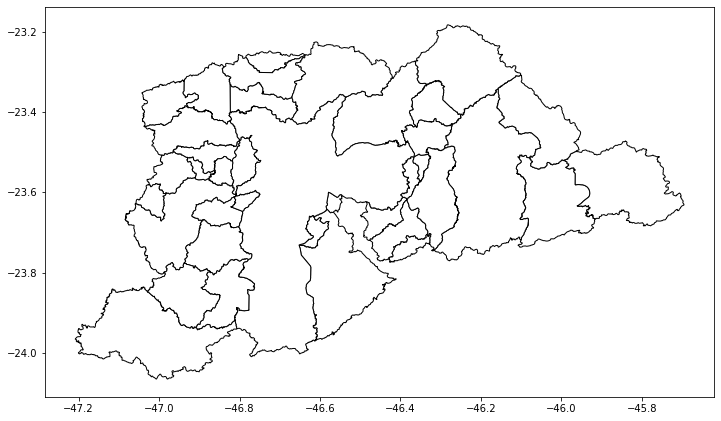

In [45]:
#let's make the plot
sars_map.plot(color='white',edgecolor='black',figsize=(12,12))

(-47.28420727220001, -45.6191287538, -24.1082922651, -23.1393774149)

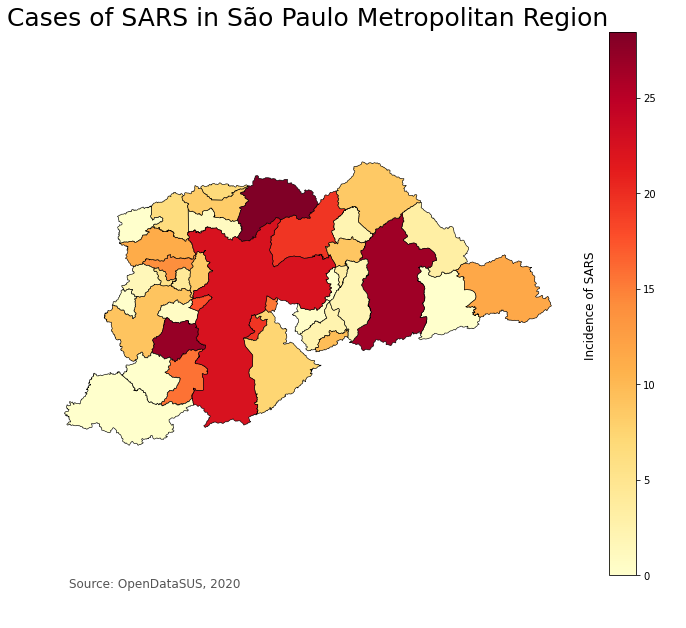

In [53]:
#finally, we make the choropletic map

#let's choose the map size
fig, ax = plt.subplots(figsize=(12,10))

#below we choose the variable to make the choropletic, we conected with the figure that we made before, we choose the color scale,
# line color and if axis will show or not
sars_map.plot(column='incidencia', ax=ax, cmap="YlOrRd",edgecolor="black",linewidth=0.6,legend=True)
ax.axis('off')

#now we add a title, legend and anotation about the source.
ax.set_title('Cases of SARS in São Paulo Metropolitan Region', fontdict={'fontsize': '25', 'fontweight': '3'})
ax.annotate('Source: OpenDataSUS, 2020',xy=(0.1, .08),
            xycoords='figure fraction', horizontalalignment='left',
            verticalalignment='top', fontsize=12, color='#555555')
ax.annotate('Incidence of SARS', xy=(.85,.6),
            xycoords='figure fraction', horizontalalignment='left',
            verticalalignment='top', fontsize=12, color='Black', rotation=90)
plt.axis('equal')

(-47.28420727220001, -45.6191287538, -24.1082922651, -23.1393774149)

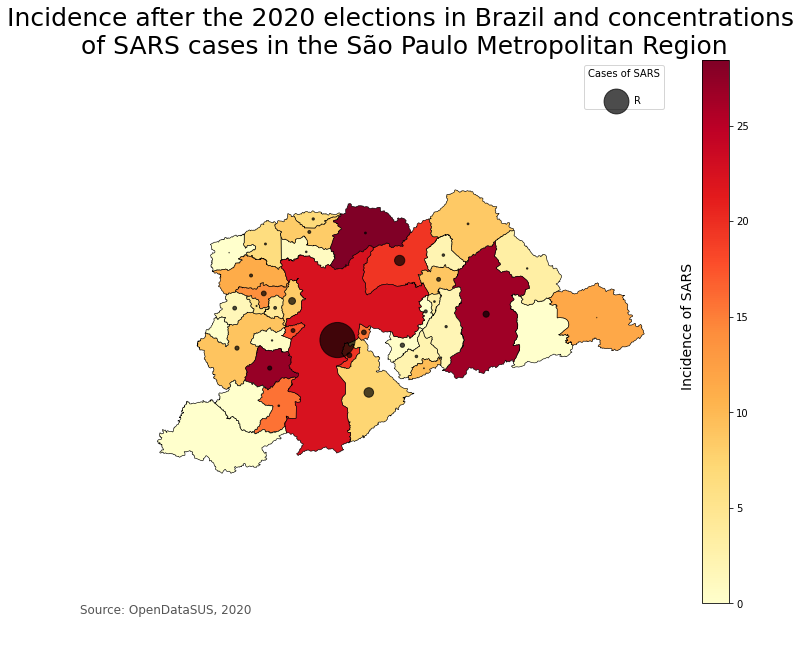

In [51]:
#I tried to make some bubbles to show the number of cases in each city, but it wasn't cool

#here we add the markersize from matplotlib
#I had to divide the cases for 100 to the circles get small in the map.
fig, ax = plt.subplots(figsize=(12,10))
sars_map.plot(column='incidencia', ax=ax, cmap="YlOrRd",edgecolor="black",linewidth=0.6,legend=True)
sars_cases.plot(ax=ax,color="black",
markersize=sars_map.tot_casos / 100,alpha=0.7,categorical=True, legend=True)
#plt.legend('SARS cases ' + '- min: ' + str(min(sars_map.tot_casos)) + ' and max' + str(max(sars_map.tot_casos)))
ax.legend("Range", loc="best", title="Cases of SARS\n")
ax.axis('off')
ax.set_title('Incidence after the 2020 elections in Brazil and concentrations\n of SARS cases in the São Paulo Metropolitan Region', fontdict={'fontsize': '25', 'fontweight': '3'})
ax.annotate('Source: OpenDataSUS, 2020',xy=(0.1, .08),
            xycoords='figure fraction', horizontalalignment='left',
            verticalalignment='top', fontsize=12, color='#555555',)
ax.annotate('Incidence of SARS', xy=(.85,.6),
            xycoords='figure fraction', horizontalalignment='left',
            verticalalignment='top', fontsize=14, color='Black', rotation=90)
plt.axis('equal')

In [54]:
#Let's save the figure without bubbles to finish our work
path = 'C:/Users/dadao/Downloads/'
fig.savefig((path + 'sars_map.png'), dpi=300)

### That is all! I hope you like it!

I don't know how to use Python and Github very well, so your contibutions are always welcome.